# G2M insight for Cab Investment firm

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Data Set:**

There are 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Combining the Datasets

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
city = pd.read_csv('City.csv')
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:

transaction = pd.read_csv('Transaction_ID.csv')
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [5]:

Customer = pd.read_csv('Customer_ID.csv')
Customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


We merge Transaction_ID and Cab_Data datasets as they have a common column, Transaction ID

In [6]:
 df_1 = pd.merge(cab_data, transaction)
 df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


We merge df_1 and Customer_ID datasets as they have a common column, Customer ID

In [7]:
df_2 = pd.merge(df_1, Customer)
df_2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB


In [9]:
df_3 = pd.merge(df_2, city)
df_3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [10]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


From the info, there are no missing values

In [11]:
df_3['Company'].nunique()

2

In [12]:
df_3['City'].nunique()

19

In [13]:
df_3.shape

(359392, 14)

In [14]:
df_3.duplicated().sum()

0

No duplicates

In [15]:
df_3['Date of Travel'].nunique()

1095

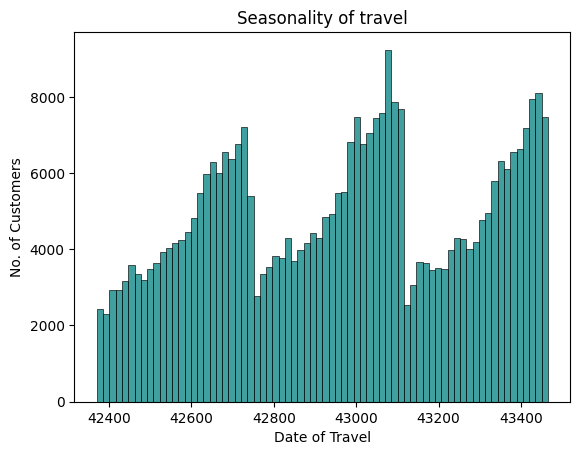

In [16]:
plt.subplot(1,1,1)
ax = sns.histplot(df_3["Date of Travel"], bins=72, kde=False, color='#008080')
ax.set(title = "Seasonality of travel")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Date of Travel')

plt.show()

In [17]:
df_3['Transaction_ID'] = df_3['Transaction ID']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '42721'),
  Text(1, 0, '43042'),
  Text(2, 0, '43056'),
  Text(3, 0, '43063'),
  Text(4, 0, '43077'),
  Text(5, 0, '43079'),
  Text(6, 0, '43084'),
  Text(7, 0, '43086'),
  Text(8, 0, '43091'),
  Text(9, 0, '43105'),
  Text(10, 0, '43106'),
  Text(11, 0, '43414'),
  Text(12, 0, '43420'),
  Text(13, 0, '43421'),
  Text(14, 0, '43428'),
  Text(15, 0, '43442'),
  Text(16, 0, '43448'),
  Text(17, 0, '43449'),
  Text(18, 0, '43455'),
  Text(19, 0, '43456')])

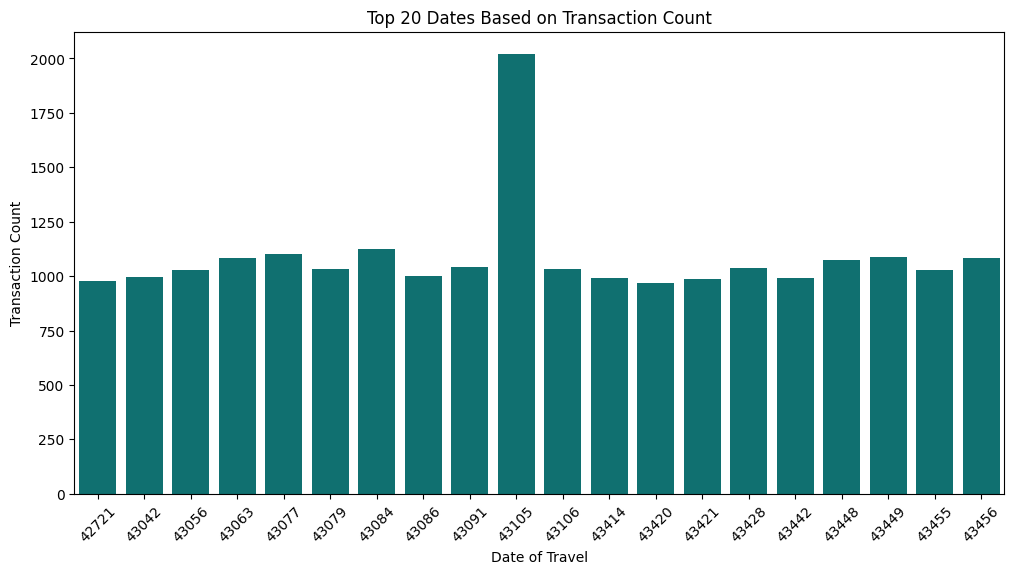

In [18]:
date_counts = df_3.groupby(['Date of Travel']).Transaction_ID.count().sort_values(ascending=False)

# Display the first 20 values
top_20_dates = date_counts.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_20_dates.index, y=top_20_dates.values, color='#008080')
ax.set(title="Top 20 Dates Based on Transaction Count", xlabel='Date of Travel', ylabel='Transaction Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

The dates of travel were encoded into a new form. Most customers use cabs seasonally. From the dates before 42400, the use of cabs increase gradually upto date 42721 where it drops sharply. After that the use of cabs start increasing again gradually. The use peaks again at date 43105 after which it drops drastically. The cycle repeats again and increases up to date 43456. It can be concluded that peak dates for cab activity are around 42271, 43105 and 43456

<Axes: >

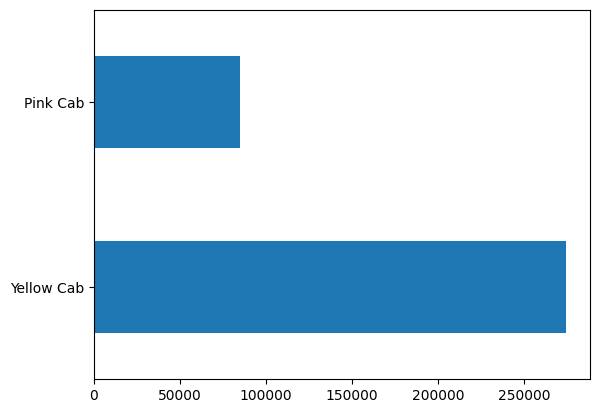

In [19]:
df_3["Company"].value_counts().plot(kind = 'barh')

In [20]:
df_3.groupby('Company').Transaction_ID.count()

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

Most customers prefer using the Yellow Cab

In [21]:
df_3.groupby('City').Transaction_ID.count().sort_values(ascending = False)

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction_ID, dtype: int64

<Axes: >

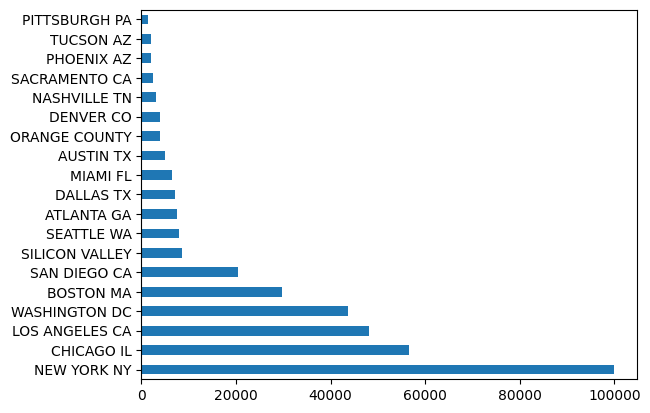

In [22]:
df_3["City"].value_counts().plot(kind = 'barh')

Most cab usage is found New York City with 99885 customers. Chicago IL follows by 56625 customers. Silicon Valley, Seattle WA, Atlanta GA, Dallas TX, Miami FL, Austin TX, Orange County, Denver CO, Nashville TN, Sacramento CA, Pittsburg PA, Tucson Az, and Phoenix AZ have the lowest cab usage.

<ipython-input-23-47be6bcb3e94>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KM Travelled', y='Price Charged', data=df_3, color=color_palette, ci=None)


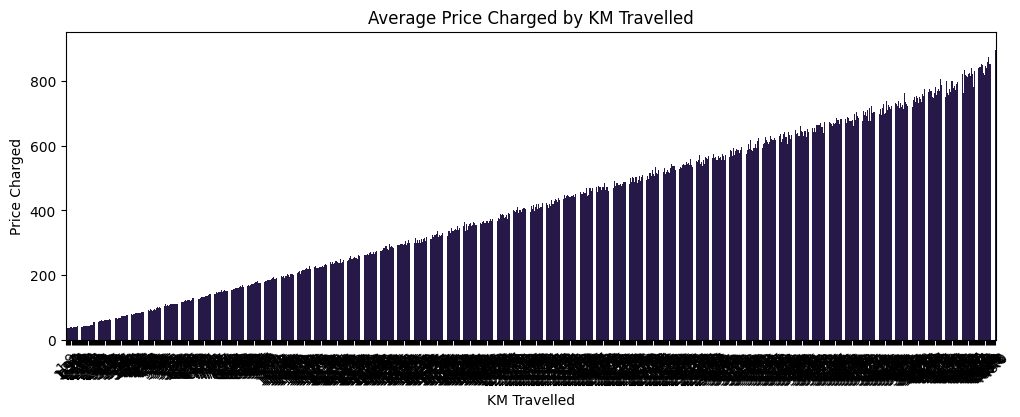

In [23]:
df_3['KM Bins'] = pd.cut(cab_data['KM Travelled'], bins=10)
plt.figure(figsize=(12, 4))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='KM Travelled', y='Price Charged', data=df_3, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Average Price Charged by KM Travelled')
plt.show()

Price charged increases with KM Travelled

<ipython-input-24-7721310f4315>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='KM Travelled', y='Cost of Trip', data=df_3, color=color_palette, ci=None)


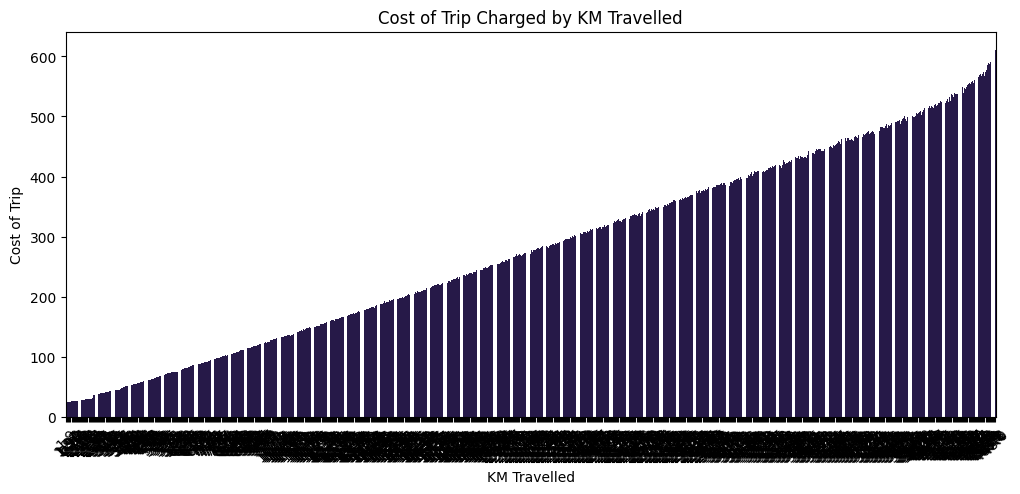

In [24]:
plt.figure(figsize=(12, 5))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='KM Travelled', y='Cost of Trip', data=df_3, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Cost of Trip Charged by KM Travelled')
plt.show()

Cost of Trip increases with KM Travelled

The profit can be calculated tripwise. This can be done by subtracting the cost of trip from the price charged to calculate the profit.

In [25]:
# Subtract 'column2' from 'column1' and create a new column 'result'
df_3['Profit'] = df_3['Price Charged'] - df_3['Cost of Trip']

df_3.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Transaction_ID,KM Bins,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",10000011,"(29.56, 34.17]",57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",10351127,"(24.95, 29.56]",281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",10412921,"(6.51, 11.12]",194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",10000012,"(29.56, 34.17]",23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",10320494,"(6.51, 11.12]",253.9808


<ipython-input-26-8c3bfb250aef>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company', y='Profit', data=df_3, color=color_palette, ci=None)


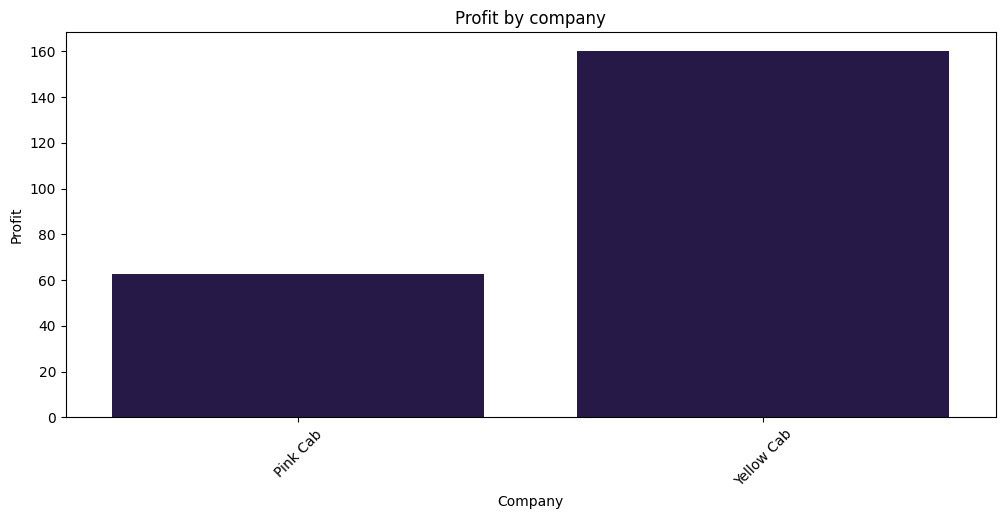

In [26]:
plt.figure(figsize=(12, 5))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='Company', y='Profit', data=df_3, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Profit by company')
plt.show()

The yellow cab makes more profit than the pink cab

<ipython-input-27-b43db9458e84>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City', y='Profit', hue = 'Company', data=df_3, color=color_palette, ci=None)
<ipython-input-27-b43db9458e84>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#46327e'` for the same effect.

  sns.barplot(x='City', y='Profit', hue = 'Company', data=df_3, color=color_palette, ci=None)


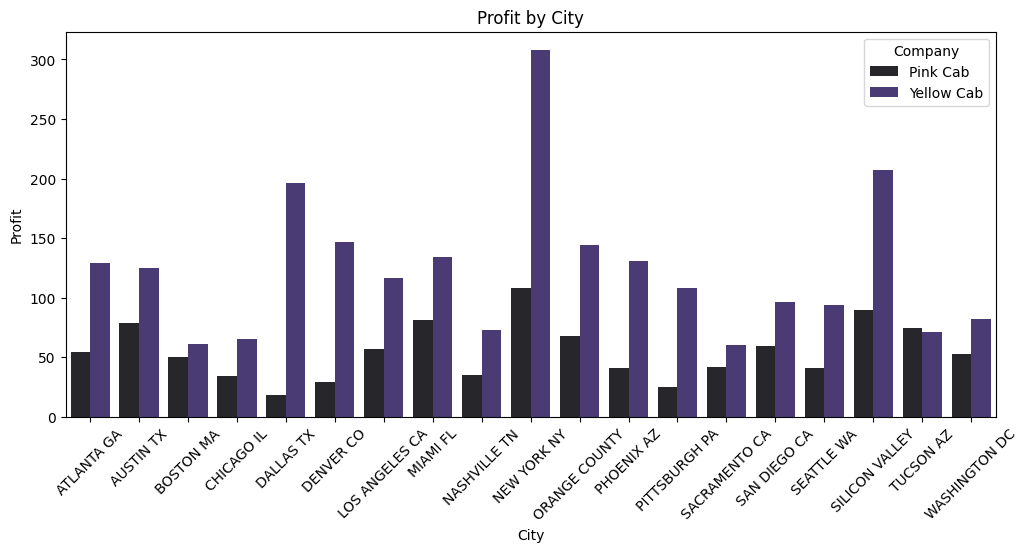

In [27]:
plt.figure(figsize=(12, 5))
color_palette = sns.color_palette('viridis')[0]
sns.barplot(x='City', y='Profit', hue = 'Company', data=df_3, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Profit by City')
plt.show()

The yellow cab makes higher profits in all the cities except Tucson AZ than the pink cab. In Tucson AZ, the pink cab makes a slightly higher profit. The cities where the yellow cab has a higher profit margin are dallas TX, Denver CO, New York NY and Silicon Valley

In [28]:
df_3['Population'] = df_3['Population'].str.replace(',', '').astype(float)
df_3['Users'] = df_3['Users'].str.replace(',', '').astype(float)
df_3.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Transaction_ID,KM Bins,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,10000011,"(29.56, 34.17]",57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,10351127,"(24.95, 29.56]",281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,10412921,"(6.51, 11.12]",194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0,10000012,"(29.56, 34.17]",23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,10320494,"(6.51, 11.12]",253.9808


In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction ID      359392 non-null  int64   
 1   Date of Travel      359392 non-null  int64   
 2   Company             359392 non-null  object  
 3   City                359392 non-null  object  
 4   KM Travelled        359392 non-null  float64 
 5   Price Charged       359392 non-null  float64 
 6   Cost of Trip        359392 non-null  float64 
 7   Customer ID         359392 non-null  int64   
 8   Payment_Mode        359392 non-null  object  
 9   Gender              359392 non-null  object  
 10  Age                 359392 non-null  int64   
 11  Income (USD/Month)  359392 non-null  int64   
 12  Population          359392 non-null  float64 
 13  Users               359392 non-null  float64 
 14  Transaction_ID      359392 non-null  int64   
 15  KM Bins          

<Axes: xlabel='Users', ylabel='City'>

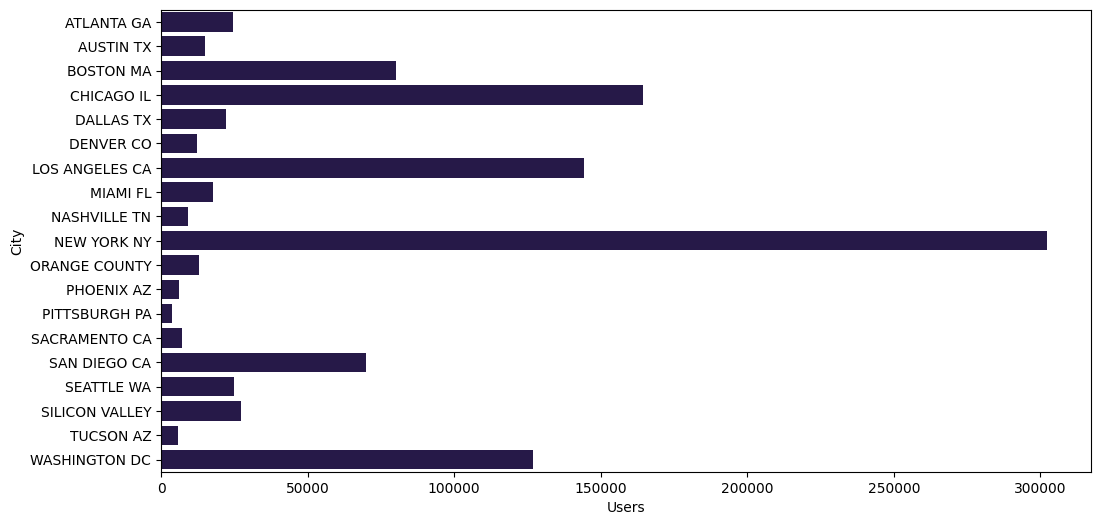

In [49]:
plt.figure(figsize =(12,6))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x = 'Users', y = 'City', data = df_3, color = color_palette)

New York city has the highest number of cab users, Pittsburg PA the least

<Axes: xlabel='Population', ylabel='City'>

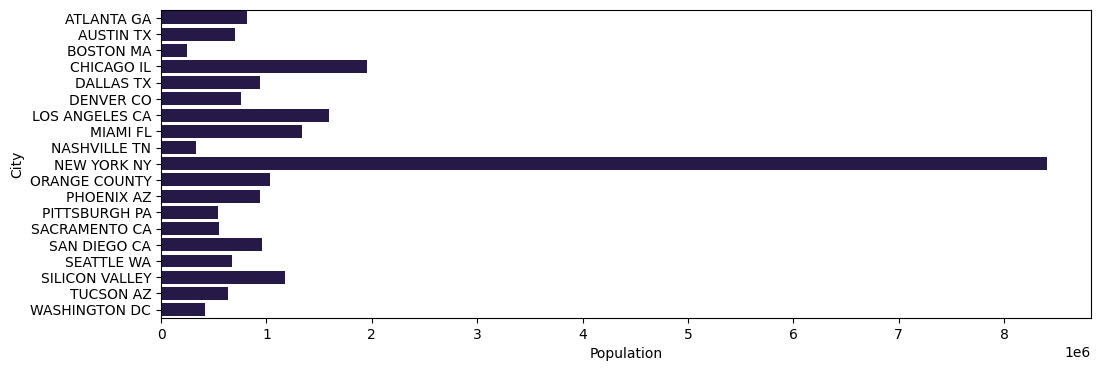

In [48]:
plt.figure(figsize =(12,4))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x = 'Population', y = 'City', data = df_3, color = color_palette)

New york has the highest population, Boston MA the least

<ipython-input-33-46983c3818f4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Population', y='Users', data=df_3, color=color_palette, ci=None)


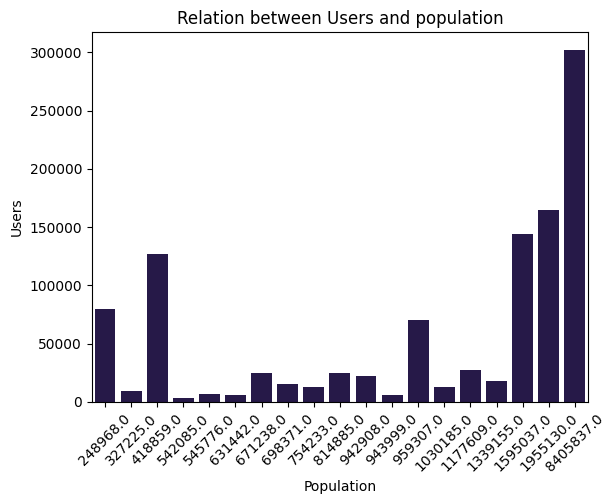

In [33]:
sns.barplot(x='Population', y='Users', data=df_3, color=color_palette, ci=None)
plt.xticks(rotation=45)
plt.title('Relation between Users and population')
plt.show()

There is no direct relationship between the number of cab users and the population of the city, save for the three most populated cities. The cities with the most cab usage are Boston MA, Washington DC, San Fransisco CA, San Diego CA, Los Angeles CA, Chicago IL, New York NY

In [34]:
df_3['Customer ID'].nunique()

46148

Customers use both cards and cash as modes of payment

In [35]:
transaction['Transaction_ID'] = transaction['Transaction ID']

In [36]:
df_3.groupby(['Customer ID','Payment_Mode']).Transaction_ID.count()

Customer ID  Payment_Mode
1            Card            18
             Cash            11
2            Card            25
             Cash            15
3            Card            30
                             ..
59998        Cash             4
59999        Card             4
             Cash             4
60000        Card             9
             Cash             9
Name: Transaction_ID, Length: 74658, dtype: int64

<Axes: >

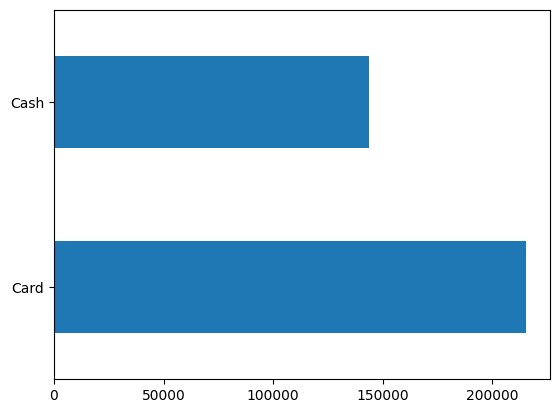

In [37]:
#Visualization of the distribution of the payment method
df_3["Payment_Mode"].value_counts().plot(kind = 'barh')

Most customers pay using card.

In [38]:
df_3['Customer_ID'] = df_3['Customer ID']

<Axes: >

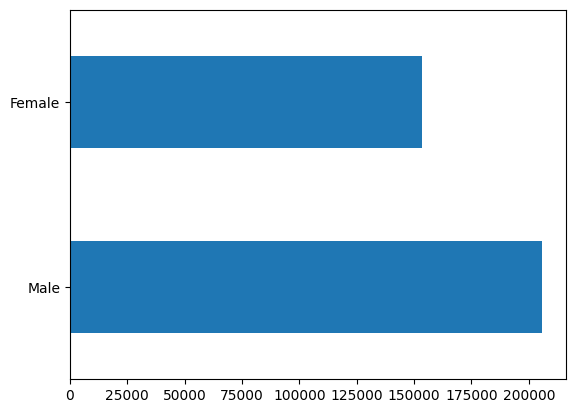

In [39]:
#Distribution of Gender
df_3["Gender"].value_counts().plot(kind = 'barh')

In [40]:
df_3.groupby('Gender').Customer_ID.count()

Gender
Female    153480
Male      205912
Name: Customer_ID, dtype: int64

More males use cabs than females by about 50000

In [41]:
df_3['Income'] = df_3['Income (USD/Month)']

In [42]:
df_3.groupby(['Age']).Customer_ID.count().sort_values(ascending=False)

Age
23    12327
20    12229
27    12030
25    11973
32    11959
34    11825
39    11798
22    11796
26    11655
19    11591
40    11536
33    11457
21    11431
30    11165
28    11163
24    11151
37    11086
36    11054
31    10930
38    10906
18    10846
29    10675
35    10555
61     4361
45     4248
49     4158
58     4107
50     4089
47     4087
59     4068
42     3970
51     3931
46     3918
64     3908
41     3852
43     3823
54     3810
52     3784
60     3775
56     3742
63     3733
44     3725
48     3700
53     3641
62     3530
57     3473
55     3442
65     3379
Name: Customer_ID, dtype: int64

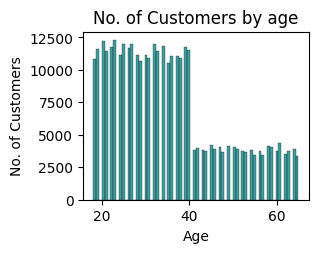

In [43]:
#Distribution of customers by age
plt.subplot(2,2,2)
ax = sns.histplot(df_3["Age"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by age")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Age')

plt.show()

Generally younger people (from 19 years up to 40 years) prefer using cabs than older people (40 years up to 65)

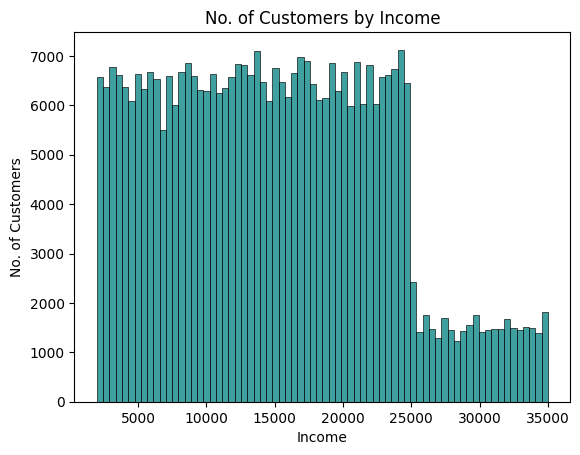

In [44]:
#Distribution of Customers by income
plt.subplot(1,1,1)
ax = sns.histplot(df_3["Income (USD/Month)"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by Income")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Income')

plt.show()

Customers with an income of less than 25000 dollars are more than Customers with an income of between 25000 dollars and 35000 dollars

# Recommendations

1. The appropriate dates for maximizing operations are periods just before:
i. 42721
ii. 43105
iii. 43456

2. It would be wise in the cities with the most cab usage or try later to come up with strategies to gain market in the cities with the low cab usage.
The cities with the most cab usage are:
Boston MA, Washington DC, San Fransisco CA, San Diego CA, Los Angeles CA, Chicago IL, New York NY

3. For more profit, investing in the yellow cab is the better option

4. As most customers use Card mode of payment, it would be convenient to use it as the main method of payment. Cash payment should also be made available for those customers that prefer cash.

5. The company should target the young people of below 40 years such as student areas, entertainment zones etc.

6. The company should target neighborhoods whose residents earn an income of less than 25000 dollars as those are the ones who use cab the most.